In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np 
import spikeinterface.comparison as sc
import spikeinterface.extractors as se
import spikeinterface.sorters as ss
import spikeinterface.toolkit as st
import spikeinterface.widgets as sw
import scipy.io
import h5py
import hdf5storage
import time
import os
from sklearn import preprocessing 

20:02:44 [I] klustakwik KlustaKwik2 version 0.2.6


In [2]:
def extract_recording(timeseries):
  sampling_frequency = 40000  # in Hz
  geom = np.zeros((num_channels, 2))
  geom[:, 0] = range(num_channels)
  recording = se.NumpyRecordingExtractor(timeseries=timeseries, geom=geom, sampling_frequency=sampling_frequency)
    
  print('Num. channels = {}'.format(len(recording.get_channel_ids())))
  print('Sampling frequency = {} Hz'.format(recording.get_sampling_frequency()))
  print('Num. timepoints = {}'.format(recording.get_num_frames()))

  return recording

In [3]:
def preprocess_recording(recording, freq_min, freq_max):
  """ Bandpass filter for recording """

  start_time = time.time()
  recording_f = st.preprocessing.bandpass_filter(recording, freq_min=freq_min, freq_max=freq_max)

  return recording_f

In [4]:
def sort_recording(recording, file_name):
  
  start_time = time.time()

  output_dir = '../tmp_MS4/'
  if not os.path.exists(output_dir):
    os.mkdir(output_dir)

  default_ms4_params = ss.Mountainsort4Sorter.default_params()
  default_ms4_params['detect_threshold'] = 4
  default_ms4_params['curation'] = False
  default_ms4_params['filter'] = False
    
  sorting = ss.run_mountainsort4(recording=recording, **default_ms4_params, output_folder=output_dir+file_name)

  print("Sorting time:", time.time() - start_time)

  return sorting

In [5]:
def postprocess_recording(recording, sorting, file_name):
  output_dir = '../average_waveform/'
  if not os.path.exists(output_dir):
    os.mkdir(output_dir)

  wf = st.postprocessing.get_unit_waveforms(recording, sorting, ms_before=1, ms_after=2,
                                            save_as_features=True, verbose=True)
  print("Shared unit spike feature names: ", sorting.get_shared_unit_spike_feature_names())
  print("Waveforms (n_spikes, n_channels, n_points)", wf[0].shape)

  max_chan = st.postprocessing.get_unit_max_channels(recording, sorting, save_as_property=True, verbose=True)
  savename = output_dir+file_name+'_avg_waveforms.mat'

  templates = st.postprocessing.get_unit_templates(recording, sorting, max_spikes_per_unit=200,
                                                  save_as_property=True, verbose=True)

  scipy.io.savemat(savename,{'wf':wf,'maxchn':max_chan}, do_compression=True)

  return wf, max_chan, templates

In [6]:
def visualize_waveforms(wf, templates, file_name):
    output_dir = "waveform_visualization/"
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    fig, axs = plt.subplots(3, 1, constrained_layout=True)
    for i in range(len(wf)):
        axs[0].plot(wf[i][:, 0, :].T, lw=0.3)
        axs[0].set_ylim(-0.1, 0.1)
        normalized_wf = preprocessing.normalize(wf[i][:,0,:])
        axs[1].plot(normalized_wf.T, lw=0.3)
        normalized_templates = preprocessing.normalize(templates[i][:,:])
        axs[2].plot(normalized_templates.T, label=i+1)
        legend = axs[2].legend(loc='lowerright', ncol=2)
        axs[0].set_title('Zoomed in waveform viz for '+ file_name)
        axs[1].set_title('Normalized waveforms viz for '+ file_name)
        axs[2].set_title('Normalized template viz for '+ file_name)
    fig.savefig(output_dir + file_name + '_waveforms.png')

In [7]:
directory_in_str = "../eisi_raw_mat_files"
directory = os.fsencode(directory_in_str)

Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 59344867
'end_frame' set to 59344867
Sorting time: 19.64696192741394
Waveform 1/4
Waveform 2/4
Waveform 3/4
Waveform 4/4
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)


<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will r

Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 55069237
'end_frame' set to 55069237
Sorting time: 16.21773910522461
Waveform 1/6
Waveform 2/6
Waveform 3/6
Waveform 4/6
Waveform 5/6
Waveform 6/6
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)


<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will r

Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 211238634
'end_frame' set to 211238634
Sorting time: 87.12408399581909
Waveform 1/5
Waveform 2/5
Waveform 3/5
Waveform 4/5
Waveform 5/5
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)


<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will r

Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 54235890
'end_frame' set to 54235890
Sorting time: 16.607626914978027
Waveform 1/3
Waveform 2/3
Waveform 3/3
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)


<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will r

Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 74964776
'end_frame' set to 74964776
Sorting time: 24.79066777229309
Waveform 1/7
Waveform 2/7
Waveform 3/7
Waveform 4/7
Waveform 5/7
Waveform 6/7
Waveform 7/7
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)


<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will r

Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 274608807
'end_frame' set to 274608807
Sorting time: 90.0990219116211
Waveform 1/2
Waveform 2/2
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)


<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)


Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 63000564
'end_frame' set to 63000564
'end_frame' set to 63000564
Sorting time: 18.4753098487854
Waveform 1/3
Waveform 2/3
Waveform 3/3
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)


<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will r

Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 59366303
'end_frame' set to 59366303
Sorting time: 19.26442003250122
Waveform 1/4
Waveform 2/4
Waveform 3/4
Waveform 4/4
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)


<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will r

Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 51807927
'end_frame' set to 51807927
Sorting time: 17.12494421005249
Waveform 1/5
Waveform 2/5
Waveform 3/5
Waveform 4/5
Waveform 5/5
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)


<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will r

Num. channels = 1
Sampling frequency = 40000.0 Hz
Num. timepoints = 239804785
'end_frame' set to 239804785
Sorting time: 80.19983005523682
Waveform 1/3
Waveform 2/3
Waveform 3/3
Shared unit spike feature names:  ['waveforms', 'waveforms_idxs']
Waveforms (n_spikes, n_channels, n_points) (300, 1, 120)


<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  legend = axs[2].legend(loc='lowerright', ncol=2)
<ipython-input-6-341f3e1a9d68>:13: MatplotlibDeprecationWarning: Unrecognized location 'lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will r

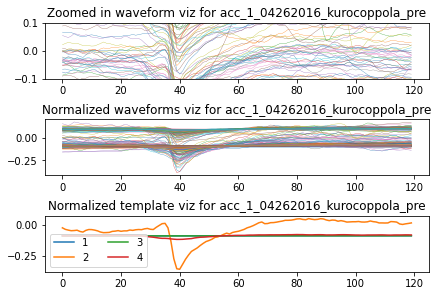

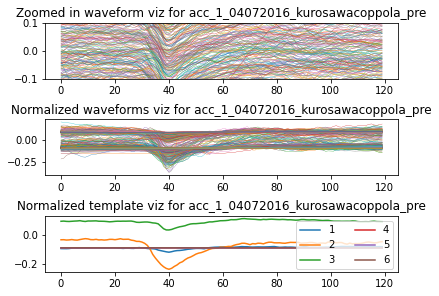

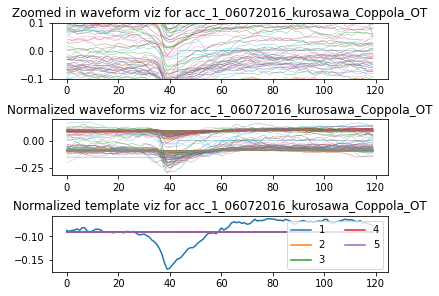

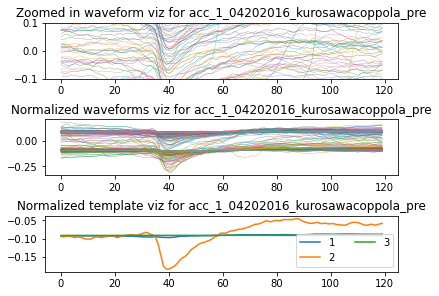

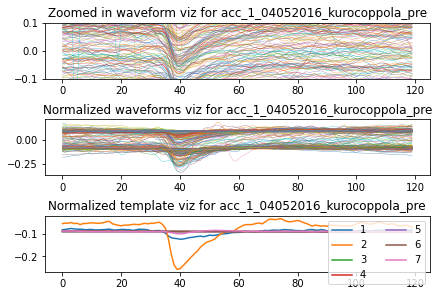

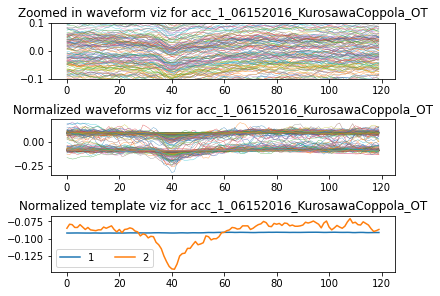

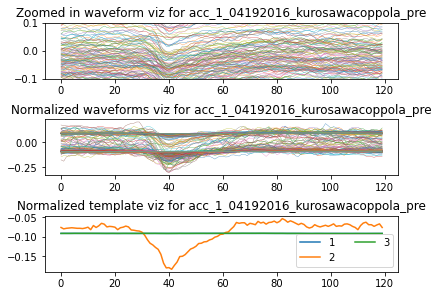

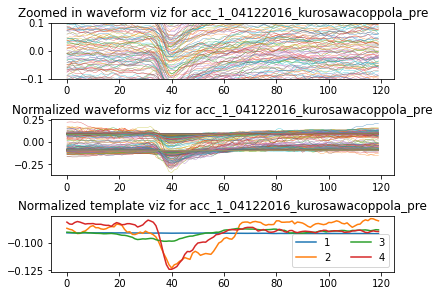

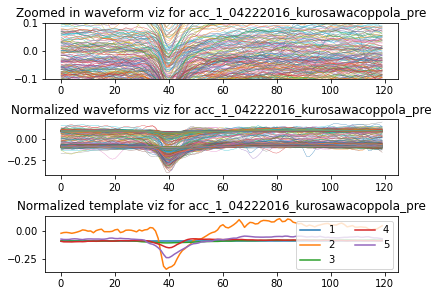

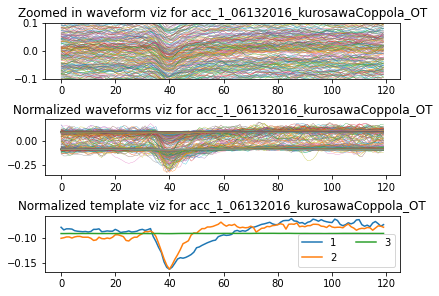

In [8]:
sessions_used = []
for file in os.listdir(directory):
    file_name = os.fsdecode(file)
    # file_name = "acc_1_04052016_kurocoppola_pre.mat"
    file_path = os.path.join(directory_in_str, file_name)
    file_name = file_name.replace('.mat', '')
    f = h5py.File(file_path, 'r')
    num_channels = f['mat'].shape[1]
    ts = np.transpose(np.array(f['mat']))
    f.close()
    recording = extract_recording(timeseries=ts)
    recording_f = preprocess_recording(recording=recording, freq_min=300, freq_max=6000)
    sorting = sort_recording(recording=recording_f, file_name=file_name)
    wf, max_chan, templates = postprocess_recording(recording = recording, sorting = sorting, file_name = file_name)
    visualize_waveforms(wf, templates, file_name)
    sessions_used.append(file_name)
scipy.io.savemat('pl2_used.mat',{'sessions_used':sessions_used}, do_compression=True)